In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("complete_house_data.csv")

In [6]:
data

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Bill Davenport,democrat,False,total,58906,157170,False,20200424
1,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Jack Edwards,republican,False,total,98257,157170,False,20200424
2,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,NaN,NaN,True,total,7,157170,False,20200424
3,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,J. Carole Keahey,democrat,False,total,66288,156362,False,20200424
4,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,NaN,NaN,True,total,5,156362,False,20200424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29631,2018,Maryland,MD,24,52,52,US House,7,gen,NaN,False,NaN,NaN,True,total,272,264710,False,20200424
29632,2018,Maryland,MD,24,52,52,US House,8,gen,NaN,False,Jamie Raskin,democrat,False,total,217679,319330,False,20200424
29633,2018,Maryland,MD,24,52,52,US House,8,gen,NaN,False,Jasen Wunder,libertarian,False,total,4853,319330,False,20200424
29634,2018,Maryland,MD,24,52,52,US House,8,gen,NaN,False,John Walsh,republican,False,total,96525,319330,False,20200424


In [7]:
district = data['district'].astype(str)

In [8]:
data['state_district'] = data['state_po'] + ", " + district

In [9]:
data_all = data.loc[data['year'] >= 2014]

In [10]:
data_2014 = data.loc[data['year'] == 2014]
data_2016 = data.loc[data['year'] == 2016]


In [11]:
data_2014

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,state_district
25459,2014,Alabama,AL,1,63,41,US House,1,gen,NaN,False,Bradley Byrne,republican,False,total,103758,152234,False,20200424,"AL, 1"
25460,2014,Alabama,AL,1,63,41,US House,1,gen,NaN,False,NaN,NaN,True,total,198,152234,False,20200424,"AL, 1"
25461,2014,Alabama,AL,1,63,41,US House,1,gen,NaN,False,Burton R. LeFlore,democrat,False,total,48278,152234,False,20200424,"AL, 1"
25462,2014,Alabama,AL,1,63,41,US House,2,gen,NaN,False,Martha Roby,republican,False,total,113103,167952,False,20200424,"AL, 2"
25463,2014,Alabama,AL,1,63,41,US House,2,gen,NaN,False,Erick Wright,democrat,False,total,54692,167952,False,20200424,"AL, 2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26811,2014,Wyoming,WY,56,83,68,US House,0,gen,NaN,False,Blank Vote,NaN,False,total,5683,171153,False,20200424,"WY, 0"
26812,2014,Wyoming,WY,56,83,68,US House,0,gen,NaN,False,Cynthia M. Lummis,republican,False,total,113038,171153,False,20200424,"WY, 0"
26813,2014,Wyoming,WY,56,83,68,US House,0,gen,NaN,False,Richard Grayson,democrat,False,total,37803,171153,False,20200424,"WY, 0"
26814,2014,Wyoming,WY,56,83,68,US House,0,gen,NaN,False,Daniel Clyde Cummings,constitution,False,total,6749,171153,False,20200424,"WY, 0"


# 2018

In [12]:
data_2018 = data.loc[data['year'] == 2018]

In [13]:
## for rows with same state_district, take #1 in candidate votes then move onto the next state_district
#data.groupby('state_district')['candidatevotes'].apply(lambda x: list(x))
#data_2018.groupby(['state', 'district', 'state_district'])['candidatevotes']\
    #.apply(lambda x: max(list(x)) if len(list(x)) > 0 else np.nan)
    
max_votes = data_2018.groupby('state_district')['candidatevotes'].max()               
max_votes = pd.DataFrame(max_votes)

In [14]:
combined_df = max_votes.merge(data_2018[["year","state", "district", "candidatevotes", "state_district", "candidate", "party", "totalvotes", "state_fips","state_po"]],\
                          on = "state_district",  how = "left")
combined_df

,state_district,candidatevotes_x,year,state,district,candidatevotes_y,candidate,party,totalvotes,state_fips,state_po
0,"AK, 0",149779,2018,Alaska,0,131199,Alyse S. Galvin,democrat,282166,2,AK
1,"AK, 0",149779,2018,Alaska,0,149779,Don Young,republican,282166,2,AK
2,"AK, 0",149779,2018,Alaska,0,1188,NaN,NaN,282166,2,AK
3,"AL, 1",153228,2018,Alabama,1,89226,Robert Kennedy Jr.,democrat,242617,1,AL
4,"AL, 1",153228,2018,Alabama,1,153228,Bradley Byrne,republican,242617,1,AL
...,...,...,...,...,...,...,...,...,...,...,...
1354,"WY, 0",127963,2018,Wyoming,0,127963,Liz Cheney,republican,201245,56,WY
1355,"WY, 0",127963,2018,Wyoming,0,59903,Greg Hunter,democrat,201245,56,WY
1356,"WY, 0",127963,2018,Wyoming,0,6918,Richard Brubaker,libertarian,201245,56,WY
1357,"WY, 0",127963,2018,Wyoming,0,6070,Daniel Clyde Cummings,constitution,201245,56,WY


In [15]:
df = combined_df[combined_df.candidatevotes_x == combined_df.candidatevotes_y]
df.drop(columns ='candidatevotes_x', inplace = True)
df = df.rename(columns = {"candidatevotes_y": "candidatevotes"})

/Users/mckennamiranda/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
#df.to_csv('house_2018_win.csv', index = False)

# 2016

In [17]:
max_votes_16 = data_2016.groupby('state_district')['candidatevotes'].max()               
max_votes_16 = pd.DataFrame(max_votes_16)

In [18]:
combined_df_16 = max_votes_16.merge(data_2016[["year","state", "district", "candidatevotes", "state_district", "candidate", "party", "totalvotes", "state_fips", "state_po"]],\
                          on = "state_district",  how = "left")
combined_df_16

,state_district,candidatevotes_x,year,state,district,candidatevotes_y,candidate,party,totalvotes,state_fips,state_po
0,"AK, 0",155088,2016,Alaska,0,9093,Bernie Souphanavong,none,308198,2,AK
1,"AK, 0",155088,2016,Alaska,0,155088,Don Young,republican,308198,2,AK
2,"AK, 0",155088,2016,Alaska,0,1228,NaN,NaN,308198,2,AK
3,"AK, 0",155088,2016,Alaska,0,111019,Steve Lindbeck,democrat,308198,2,AK
4,"AK, 0",155088,2016,Alaska,0,31770,Jim C. McDermott,libertarian,308198,2,AK
...,...,...,...,...,...,...,...,...,...,...,...
1435,"WY, 0",156176,2016,Wyoming,0,10362,Daniel Clyde Cummings,constitution,258788,56,WY
1436,"WY, 0",156176,2016,Wyoming,0,75466,Ryan Greene,democrat,258788,56,WY
1437,"WY, 0",156176,2016,Wyoming,0,739,NaN,NaN,258788,56,WY
1438,"WY, 0",156176,2016,Wyoming,0,9033,Lawrence Gerard Struempf,libertarian,258788,56,WY


In [19]:
df_16 = combined_df_16[combined_df_16.candidatevotes_x == combined_df_16.candidatevotes_y]
df_16.drop(columns ='candidatevotes_x', inplace = True)
df_16 = df_16.rename(columns = {"candidatevotes_y": "candidatevotes"})

/Users/mckennamiranda/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
df_16

,state_district,year,state,district,candidatevotes,candidate,party,totalvotes,state_fips,state_po
1,"AK, 0",2016,Alaska,0,155088,Don Young,republican,308198,2,AK
5,"AL, 1",2016,Alabama,1,208083,Bradley Byrne,republican,215893,1,AL
9,"AL, 2",2016,Alabama,2,134886,Martha Roby,republican,276584,1,AL
11,"AL, 3",2016,Alabama,3,192164,Mike Rogers,republican,287104,1,AL
14,"AL, 4",2016,Alabama,4,235925,Robert B. Aderholt,republican,239444,1,AL
...,...,...,...,...,...,...,...,...,...,...
1422,"WI, 8",2016,Wisconsin,8,227892,Mike Gallagher,republican,363780,55,WI
1427,"WV, 1",2016,West Virginia,1,163469,David B. McKinley,republican,237003,54,WV
1429,"WV, 2",2016,West Virginia,2,140807,Alexander X. Mooney,republican,242014,54,WV
1431,"WV, 3",2016,West Virginia,3,140741,Evan H. Jenkins,republican,207332,54,WV


In [21]:
#df.to_csv('house_2016_winner.csv', index = False)

# 2014

In [22]:
max_votes_14 = data_2014.groupby('state_district')['candidatevotes'].max()               
max_votes_14 = pd.DataFrame(max_votes_14)

In [23]:
combined_df_14 = max_votes_14.merge(data_2014[["year","state", "district", "candidatevotes", "state_district", "candidate", "party", "totalvotes", "state_fips", "state_po"]],\
                          on = "state_district",  how = "left")
combined_df_14

,state_district,candidatevotes_x,year,state,district,candidatevotes_y,candidate,party,totalvotes,state_fips,state_po
0,"AK, 0",142572,2014,Alaska,0,142572,Don Young,republican,279741,2,AK
1,"AK, 0",142572,2014,Alaska,0,1277,NaN,NaN,279741,2,AK
2,"AK, 0",142572,2014,Alaska,0,114602,Forrest Dunbar,democrat,279741,2,AK
3,"AK, 0",142572,2014,Alaska,0,21290,Jim C. McDermott,libertarian,279741,2,AK
4,"AL, 1",103758,2014,Alabama,1,103758,Bradley Byrne,republican,152234,1,AL
...,...,...,...,...,...,...,...,...,...,...,...
1352,"WY, 0",113038,2014,Wyoming,0,5683,Blank Vote,NaN,171153,56,WY
1353,"WY, 0",113038,2014,Wyoming,0,113038,Cynthia M. Lummis,republican,171153,56,WY
1354,"WY, 0",113038,2014,Wyoming,0,37803,Richard Grayson,democrat,171153,56,WY
1355,"WY, 0",113038,2014,Wyoming,0,6749,Daniel Clyde Cummings,constitution,171153,56,WY


In [24]:
df_14 = combined_df_14[combined_df_14.candidatevotes_x == combined_df_14.candidatevotes_y]
df_14.drop(columns ='candidatevotes_x', inplace = True)
df_14 = df_14.rename(columns = {"candidatevotes_y": "candidatevotes"})

/Users/mckennamiranda/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
df_14

,state_district,year,state,district,candidatevotes,candidate,party,totalvotes,state_fips,state_po
0,"AK, 0",2014,Alaska,0,142572,Don Young,republican,279741,2,AK
4,"AL, 1",2014,Alabama,1,103758,Bradley Byrne,republican,152234,1,AL
7,"AL, 2",2014,Alabama,2,113103,Martha Roby,republican,167952,1,AL
12,"AL, 3",2014,Alabama,3,103558,Mike Rogers,republican,156620,1,AL
13,"AL, 4",2014,Alabama,4,132831,Robert B. Aderholt,republican,134752,1,AL
...,...,...,...,...,...,...,...,...,...,...
1337,"WI, 8",2014,Wisconsin,8,188553,Reid J. Ribble,republican,290048,55,WI
1341,"WV, 1",2014,West Virginia,1,92491,David B. McKinley,republican,144737,54,WV
1345,"WV, 2",2014,West Virginia,2,72619,Alex X. Mooney,republican,154250,54,WV
1349,"WV, 3",2014,West Virginia,3,77713,Evan Jenkins,republican,140401,54,WV


In [26]:
#df_14.to_csv('house_2014_winner.csv', index = False)

# data all

In [27]:
combined = df_14.append([df_16, df])

In [28]:
combined

,state_district,year,state,district,candidatevotes,candidate,party,totalvotes,state_fips,state_po
0,"AK, 0",2014,Alaska,0,142572,Don Young,republican,279741,2,AK
4,"AL, 1",2014,Alabama,1,103758,Bradley Byrne,republican,152234,1,AL
7,"AL, 2",2014,Alabama,2,113103,Martha Roby,republican,167952,1,AL
12,"AL, 3",2014,Alabama,3,103558,Mike Rogers,republican,156620,1,AL
13,"AL, 4",2014,Alabama,4,132831,Robert B. Aderholt,republican,134752,1,AL
...,...,...,...,...,...,...,...,...,...,...
1344,"WI, 8",2018,Wisconsin,8,209410,Mike Gallagher,republican,328774,55,WI
1347,"WV, 1",2018,West Virginia,1,127997,David B McKinley,republican,198214,54,WV
1349,"WV, 2",2018,West Virginia,2,110504,Alex X. Mooney,republican,204792,54,WV
1352,"WV, 3",2018,West Virginia,3,98645,Carol Miller,republican,174985,54,WV


In [29]:
combined.loc[combined['party'] == 'democratic-farmer-labor']

,state_district,year,state,district,candidatevotes,candidate,party,totalvotes,state_fips,state_po
593,"MN, 1",2014,Minnesota,1,122851,Timothy J. Walz,democratic-farmer-labor,226695,27,MN
604,"MN, 4",2014,Minnesota,4,147857,Betty McCollum,democratic-farmer-labor,241637,27,MN
616,"MN, 7",2014,Minnesota,7,130546,Collin C. Peterson,democratic-farmer-labor,240835,27,MN
581,"MN, 2",2018,Minnesota,2,177958,Angie Craig,democratic-farmer-labor,337968,27,MN
584,"MN, 3",2018,Minnesota,3,202404,Dean Phillips,democratic-farmer-labor,363949,27,MN
587,"MN, 4",2018,Minnesota,4,216865,Betty McCollum,democratic-farmer-labor,328614,27,MN
591,"MN, 5",2018,Minnesota,5,267703,Ilhan Omar,democratic-farmer-labor,343358,27,MN
597,"MN, 7",2018,Minnesota,7,146672,Collin C. Peterson,democratic-farmer-labor,281509,27,MN


In [30]:
combined

,state_district,year,state,district,candidatevotes,candidate,party,totalvotes,state_fips,state_po
0,"AK, 0",2014,Alaska,0,142572,Don Young,republican,279741,2,AK
4,"AL, 1",2014,Alabama,1,103758,Bradley Byrne,republican,152234,1,AL
7,"AL, 2",2014,Alabama,2,113103,Martha Roby,republican,167952,1,AL
12,"AL, 3",2014,Alabama,3,103558,Mike Rogers,republican,156620,1,AL
13,"AL, 4",2014,Alabama,4,132831,Robert B. Aderholt,republican,134752,1,AL
...,...,...,...,...,...,...,...,...,...,...
1344,"WI, 8",2018,Wisconsin,8,209410,Mike Gallagher,republican,328774,55,WI
1347,"WV, 1",2018,West Virginia,1,127997,David B McKinley,republican,198214,54,WV
1349,"WV, 2",2018,West Virginia,2,110504,Alex X. Mooney,republican,204792,54,WV
1352,"WV, 3",2018,West Virginia,3,98645,Carol Miller,republican,174985,54,WV


In [31]:
combined = combined.replace('democratic-farmer-labor', 'democrat')

In [32]:
combined.loc[combined['party'] == 'democratic']

,state_district,year,state,district,candidatevotes,candidate,party,totalvotes,state_fips,state_po


In [33]:
combined['party'].unique()

array(['republican', 'democrat'], dtype=object)

In [34]:
#combined.to_csv("house_data_14_16_18_final.csv")

# State / Party df

In [35]:
combined_fips = combined_df_16[['state_fips','state']]

In [36]:
combined_fips = combined_fips.drop_duplicates(subset = 'state')
combined_fips

,state_fips,state
0,2,Alaska
5,1,Alabama
23,5,Arkansas
33,4,Arizona
59,6,California
165,8,Colorado
187,9,Connecticut
213,10,Delaware
217,12,Florida
287,13,Georgia


In [37]:
combined_fips.to_csv("state_fips.csv")

In [38]:
df_16  =df_16.replace('democratic-farmer-labor', 'democrat')

In [39]:
state_party_16 = pd.DataFrame(df_16.groupby("state")['party'].describe())
state_party_16['year'] = 2016
state_party_14 = pd.DataFrame(df_14.groupby("state")['party'].describe())
state_party_14['year'] = 2014
state_party_18 = pd.DataFrame(df.groupby("state")['party'].describe())
state_party_18 = state_party_18.replace('democratic-farmer-labor', 'democrat')
state_party_18['year'] = 2018

state_party_all = state_party_14.append([state_party_16, state_party_18])

In [40]:
result = pd.merge(state_party_all, combined_fips, on = 'state')
#result.drop(columns = ['state_fips_x', 'state_fips_y'])
result = result.drop_duplicates(subset = ['state', 'year'])
result

,state,count,unique,top,freq,year,state_fips
0,Alabama,7,2,republican,6,2014,1
1,Alabama,7,2,republican,6,2016,1
2,Alabama,7,2,republican,6,2018,1
3,Alaska,1,1,republican,1,2014,2
4,Alaska,1,1,republican,1,2016,2
...,...,...,...,...,...,...,...
145,Wisconsin,8,2,republican,5,2016,55
146,Wisconsin,8,2,republican,5,2018,55
147,Wyoming,1,1,republican,1,2014,56
148,Wyoming,1,1,republican,1,2016,56


In [41]:
# AWS Connection
from sqlalchemy import create_engine
rds_connection_string = "postgres:postgres@electionanalysis.c2buyytj82fm.us-west-1.rds.amazonaws.com:5432/Election_db"
engine = create_engine(f'postgresql://{rds_connection_string}')


ModuleNotFoundError: No module named 'psycopg2'

In [ ]:
engine.table_names()

In [ ]:
# # Import House Election Table 
import pandas as pd
pd.read_sql_query('select * from house_elections_table', con=engine).head()

In [ ]:
# Import Presidential Election Table 
pd.read_sql_query('select* from combined_presidential_table', con=engine).head()

In [ ]:
#Import Senate Election Table 
pd.read_sql_query('select* from senate_elections_table', con=engine).head()

In [44]:
#state_party_all.to_csv("state_party_all.csv")

# Machine Learning

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [43]:
election = result
X = election[['top', 'year']]
y = election["state_fips"].values.reshape(-1, 1)
print(X.shape, y.shape)


(150, 2) (150, 1)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [45]:
data = X.copy()
data_binary_encoded = pd.get_dummies(data, columns=["top"])
data_binary_encoded.head()

,year,top_democrat,top_republican
0,2014,0,1
1,2016,0,1
2,2018,0,1
3,2014,0,1
4,2016,0,1


In [46]:
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,year,top_democrat,top_republican
4,2016,0,1
32,2018,1,0
142,2016,0,1
85,2016,1,0
86,2018,1,0


In [47]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

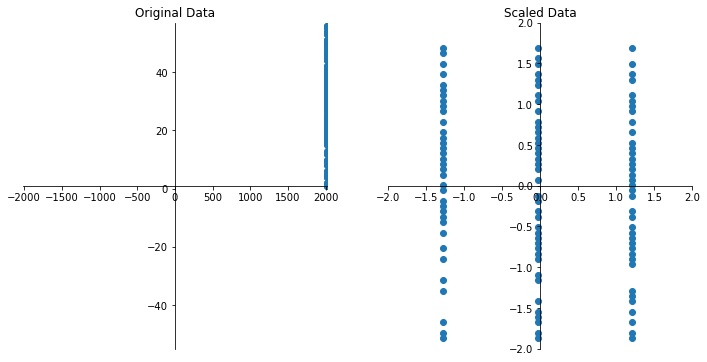

In [48]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["year"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["year"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

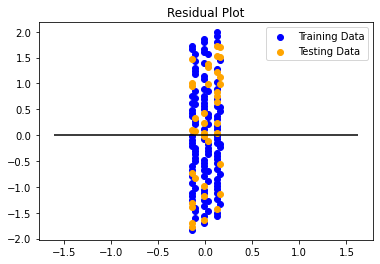

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.1754660807248951, R2: -0.10066393340789737


# Exporting to csv

In [51]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [52]:
X_train = model.predict(X_train_scaled)
y_train =  (model.predict(X_train_scaled) - y_train_scaled)
X_test = model.predict(X_test_scaled)
y_test = (model.predict(X_test_scaled) - y_test_scaled)

In [53]:
X_train = pd.DataFrame(np.array(X_train), columns = ['X_train'])
y_train = pd.DataFrame(np.array(y_train), columns = ['y_train'])
X_test = pd.DataFrame(np.array(X_test), columns = ['X_test'])
y_test = pd.DataFrame(np.array(y_test), columns = ['y_test'])

In [54]:
trained_df = pd.concat([X_train,y_train], axis = 1)

In [55]:
trained_df.to_csv('House_trained.csv')

# Testing Deep Learning Model 

In [56]:
voice = result

X = election[['top', 'year']]
y = election["state_fips"]
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

data = X.copy()
data_binary_encoded = pd.get_dummies(data, columns=["top"])
data_binary_encoded.head()

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



(150, 2) (150,)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [58]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [59]:
from tensorflow.keras.utils import to_categorical

In [60]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=56, activation='relu', input_dim=3))
model.add(Dense(units=56, activation='softmax'))

In [100]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 56)                224       
_________________________________________________________________
dense_21 (Dense)             (None, 56)                3192      
Total params: 3,416
Trainable params: 3,416
Non-trainable params: 0
_________________________________________________________________


In [101]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
4/4 - 0s - loss: 4.0771 - accuracy: 0.0179
Epoch 2/100
4/4 - 0s - loss: 4.0519 - accuracy: 0.0179
Epoch 3/100
4/4 - 0s - loss: 4.0286 - accuracy: 0.0268
Epoch 4/100
4/4 - 0s - loss: 4.0090 - accuracy: 0.0268
Epoch 5/100
4/4 - 0s - loss: 3.9889 - accuracy: 0.0268
Epoch 6/100
4/4 - 0s - loss: 3.9686 - accuracy: 0.0268
Epoch 7/100
4/4 - 0s - loss: 3.9502 - accuracy: 0.0268
Epoch 8/100
4/4 - 0s - loss: 3.9307 - accuracy: 0.0357
Epoch 9/100
4/4 - 0s - loss: 3.9114 - accuracy: 0.0357
Epoch 10/100
4/4 - 0s - loss: 3.8920 - accuracy: 0.0357
Epoch 11/100
4/4 - 0s - loss: 3.8730 - accuracy: 0.0446
Epoch 12/100
4/4 - 0s - loss: 3.8547 - accuracy: 0.0446
Epoch 13/100
4/4 - 0s - loss: 3.8348 - accuracy: 0.0446
Epoch 14/100
4/4 - 0s - loss: 3.8151 - accuracy: 0.0446
Epoch 15/100
4/4 - 0s - loss: 3.7950 - accuracy: 0.0446
Epoch 16/100
4/4 - 0s - loss: 3.7748 - accuracy: 0.0446
Epoch 17/100
4/4 - 0s - loss: 3.7547 - accuracy: 0.0446
Epoch 18/100
4/4 - 0s - loss: 3.7341 - accuracy: 0.0446
E

In [107]:
deep_model = Sequential()
deep_model.add(Dense(units=54, activation='relu', input_dim=3))
deep_model.add(Dense(units=54, activation='softmax'))

In [ ]:
deep_model.summary()

In [105]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [106]:
deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
4/4 - 0s - loss: 4.0879 - accuracy: 0.0089
Epoch 2/100
4/4 - 0s - loss: 4.0605 - accuracy: 0.0089
Epoch 3/100
4/4 - 0s - loss: 4.0367 - accuracy: 0.0268
Epoch 4/100
4/4 - 0s - loss: 4.0136 - accuracy: 0.0268
Epoch 5/100
4/4 - 0s - loss: 3.9916 - accuracy: 0.0357
Epoch 6/100
4/4 - 0s - loss: 3.9699 - accuracy: 0.0446
Epoch 7/100
4/4 - 0s - loss: 3.9485 - accuracy: 0.0536
Epoch 8/100
4/4 - 0s - loss: 3.9277 - accuracy: 0.0536
Epoch 9/100
4/4 - 0s - loss: 3.9064 - accuracy: 0.0536
Epoch 10/100
4/4 - 0s - loss: 3.8855 - accuracy: 0.0536
Epoch 11/100
4/4 - 0s - loss: 3.8647 - accuracy: 0.0536
Epoch 12/100
4/4 - 0s - loss: 3.8437 - accuracy: 0.0536
Epoch 13/100
4/4 - 0s - loss: 3.8225 - accuracy: 0.0536
Epoch 14/100
4/4 - 0s - loss: 3.8011 - accuracy: 0.0536
Epoch 15/100
4/4 - 0s - loss: 3.7801 - accuracy: 0.0536
Epoch 16/100
4/4 - 0s - loss: 3.7595 - accuracy: 0.0536
Epoch 17/100
4/4 - 0s - loss: 3.7372 - accuracy: 0.0536
Epoch 18/100
4/4 - 0s - loss: 3.7175 - accuracy: 0.0536
E

In [102]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 4.0130 - accuracy: 0.0263
Normal Neural Network - Loss: 4.012956619262695, Accuracy: 0.02631578966975212


In [150]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

38/1 - 0s - loss: 3.9095 - accuracy: 0.0263
Deep Neural Network - Loss: 3.986650253597059, Accuracy: 0.02631578966975212
